Examples here adapted from "Python Machine Learning" by Sebastian Raschka

In [189]:
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Some helpful convenience functions that we will need.


In [159]:
def scatterplot_xy_data(d1_x, d1_y, d2_x, d2_y, d1_label, d2_label, x_axis_label, y_axis_label):
    """
        Generate a scatter plot of two classes of data.
        
        Args:
            d1_x, d1_y: lists of the x and y data for class 1
            d2_x, d2_y: lists of the x and y data for class 2
            d1_label, d2_label: class labels
            x_axis_label, y_axis_label: axis labels
    """
    plt.scatter(d1_x, d1_y,
                color='red', marker='o', label=d1_label)
    plt.scatter(d2_x, d2_y,
                color='blue', marker='x', label=d2_label)

    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.legend(loc='upper left')

    plt.tight_layout()
    return plt

### Download the Iris dataset.

The Iris dataset is a classic one in machine learning algorithms for testing.  We first fetch it with the following code and then explore it.

In [244]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Plotting the Iris data

The next section allows us to plot the four facets of the iris data against each other.  One pairing is visually linearly separable while one pairing is not.  Can you identify which?

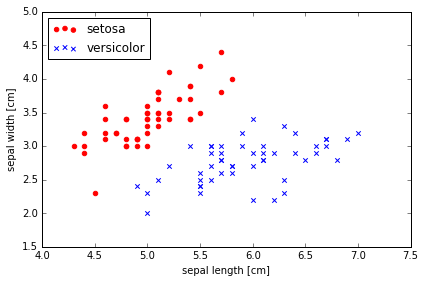

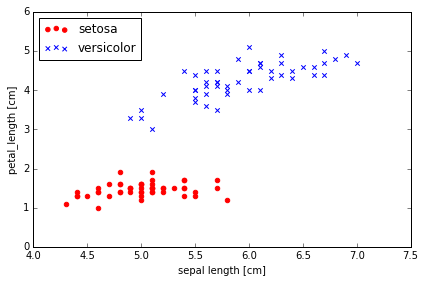

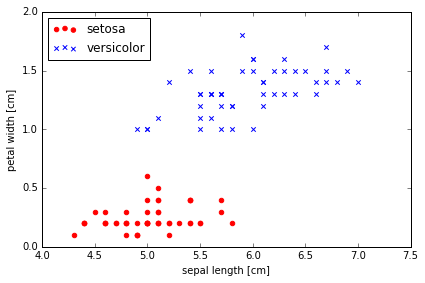

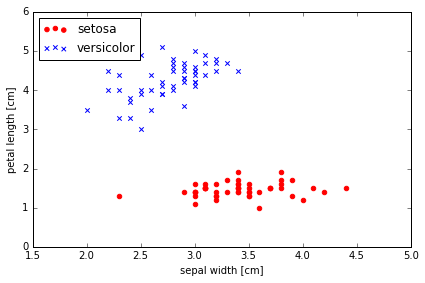

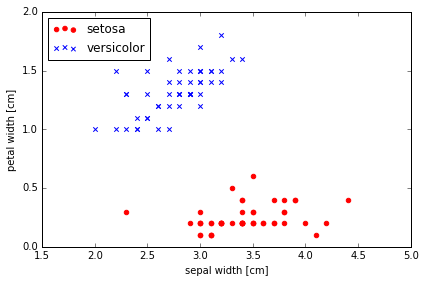

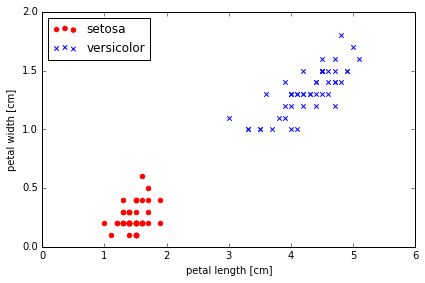

In [245]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
min_index = 0
max_index = 100
flower_0_label = 'setosa'
flower_1_label = 'versicolor'
base_label = 'Iris-setosa'

# # select versicolor and virginica
# min_index = 50
# max_index = 150
# flower_0_label = 'versicolor'
# flower_1_label = 'virginica'
# base_label = 'Iris-versicolor'


y = df.iloc[min_index:max_index, 4].values
y = np.where(y == base_label, -1, 1)

###################

# extract sepal length and sepal width
X = df.iloc[min_index:max_index, [0, 1]].values

scatterplot_xy_data(X[:50, 0], X[:50, 1], X[50:100, 0], X[50:100, 1], 
                    flower_0_label, flower_1_label, "sepal length [cm]", "sepal width [cm]").show()

# extract sepal length and petal length
X = df.iloc[min_index:max_index, [0, 2]].values

scatterplot_xy_data(X[:50, 0], X[:50, 1], X[50:100, 0], X[50:100, 1], 
                    flower_0_label, flower_1_label, "sepal length [cm]", "petal_length [cm]").show()

# extract sepal length and petal width
X = df.iloc[min_index:max_index, [0, 3]].values

scatterplot_xy_data(X[:50, 0], X[:50, 1], X[50:100, 0], X[50:100, 1], 
                    flower_0_label, flower_1_label, "sepal length [cm]", "petal width [cm]").show()

# extract sepal width and petal length
X = df.iloc[min_index:max_index, [1, 2]].values

scatterplot_xy_data(X[:50, 0], X[:50, 1], X[50:100, 0], X[50:100, 1], 
                    flower_0_label, flower_1_label, "sepal width [cm]", "petal length [cm]").show()

# extract sepal width and petal width
X = df.iloc[min_index:max_index, [1, 3]].values

scatterplot_xy_data(X[:50, 0], X[:50, 1], X[50:100, 0], X[50:100, 1], 
                    flower_0_label, flower_1_label, "sepal width [cm]", "petal width [cm]").show()

# extract petal length and petal width
X = df.iloc[min_index:max_index, [2, 3]].values

scatterplot_xy_data(X[:50, 0], X[:50, 1], X[50:100, 0], X[50:100, 1], 
                    flower_0_label, flower_1_label, "petal length [cm]", "petal width [cm]").show()


For almost all dimensions there are clear clusters that form between setosa and versicolor.  Sepal width and sepal length are apparently the two closest.

For the  first part of this analysis, we will cluster based on sepal and petal lengths.  We can see that the two irises are distinct clusters with setosa having shorter sepal and petal lengths.  Versicolor 
are typically longer in both dimensions.  The question then becomes, how do we go about training a model to classify samples based on this data?
<br>
<br>

### A function for plotting decision regions

We will use this function to plot the decision regions of our classifier as we build it over time.

In [239]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, iter_num=-1, resolution=0.02):
    """
    Args:
        iter_num: which iteration of training to plot.
    """

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T, iter_num=iter_num)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
def sk_learn_plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    Args:
        iter_num: which iteration of training to plot.
    """

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)        

# Logistic Regression with Gradient Descent

This is an example of a logistic regression classifier trained by gradient descent. 

In [246]:
class LogisticRegressionGD(object):
    """Logistic regression classifier via gradient descent.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta         # Learning Rate
        self.n_iter = n_iter   # Number of iterations of the fitting.

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = [np.zeros(1 + X.shape[1])]
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y - output)
            self.w_.append(self.w_[-1].copy())
            self.w_[-1][1:] += self.eta * X.T.dot(errors)
            self.w_[-1][0] += self.eta * errors.sum()
            
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X, iter_num=-1):
        """Calculate net input"""
        return np.dot(X, self.w_[iter_num][1:]) + self.w_[iter_num][0]

    def predict(self, X, iter_num=-1):
        """Return class label after unit step"""
        # Logistic regression returns labels of 0 and 1, 
        # our threshold is then 0.5
        return np.where(self.activation(X,iter_num=iter_num) >= 0.5, 1, 0)
    
    # The activation function is now a sigmoid 
    # function.
    def activation(self, X, iter_num=-1):
        """ Compute sigmoid activation."""
        z = self.net_input(X,iter_num=iter_num)
        sigmoid = 1.0 / (1.0 + np.exp(-z))
        return sigmoid

In [247]:
import random
from sklearn.datasets import load_iris

In [248]:
def get_iris_data(feature_1, feature_2,train_set_size = 20,dataset = 0):
    """ Get a subset of the iris data for training.
    
    Args:
        feature_1: what index of feature to use.
        feature_2: what index of feature to use.
        train_set_size: how big of a training set to use
        dataset: 0 - default setosa and versicolor
                 1 - versicolor and virginica
    Returns:
        X_train, X_test, y_train, y_test
    """

    sample_low = 0
    sample_high = 100
    
    if dataset == 1:
        sample_low = 50
        sample_high = 150
        
    iris = load_iris()
    
    # Take the top 100 pieces of iris data.
    items = iris.items()
    items_copy = []
    for i in range(len(items)):
        items_copy.append((items[i][0],items[i][1][sample_low:sample_high]))

    iris = dict(items_copy)

    # Shuffle the data.
    indices = [i for i in range(len(iris['data']))]
    random.shuffle(indices)
    X = np.array([iris['data'][indices[0], [feature_1,feature_2]]])
    y = [iris['target'][indices[0]]]
    for i in indices[1:]:
        X = np.concatenate((X,([iris['data'][i, [feature_1,feature_2]]])),axis=0)
        y = np.append(y,iris['target'][i])

    # Standardize the data in iris.
    X_std = np.copy(X)
    X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

    # Separate into training and testing sets.
    X_train = np.copy(X_std[:train_set_size])
    X_test = np.copy(X_std[train_set_size:])

    y_train = y[:train_set_size]
    y_test = y[train_set_size:]
    
    return X_train, X_test, y_train, y_test

### Train and View the Results

The code below trains the logistic regression model on the dataset using the specified number of iterations.  

Try changing the value of n_iter and eta.  

In [249]:
# Uncomment to print the specifics of the iris dataset.
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### Note on the following:

The dataset keyword in the following selects between setosa-versicolor, and versicolor-virginica comparisons.  One set is easily separable but one set is not.  Can you spot which?

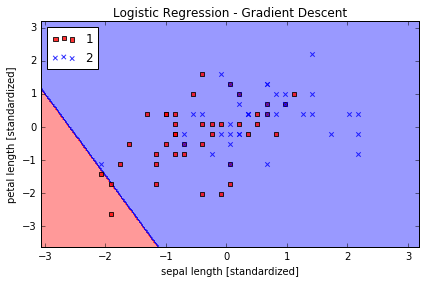

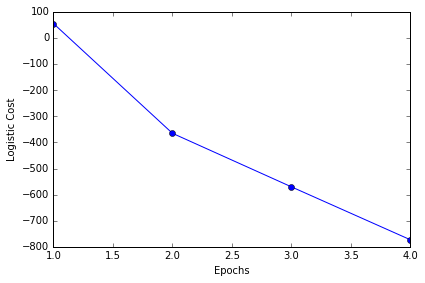

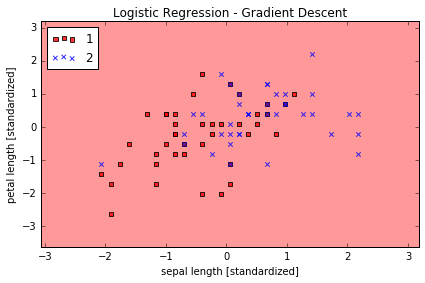

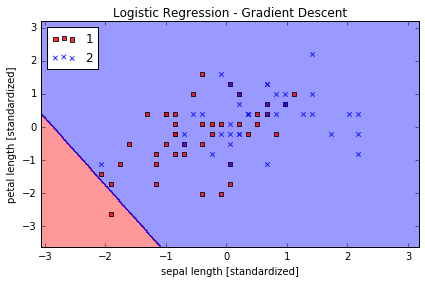

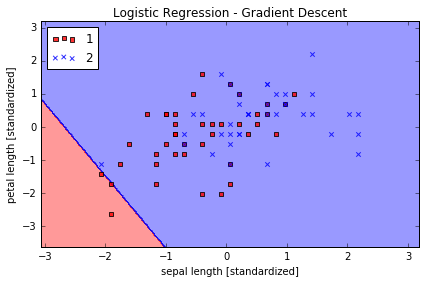

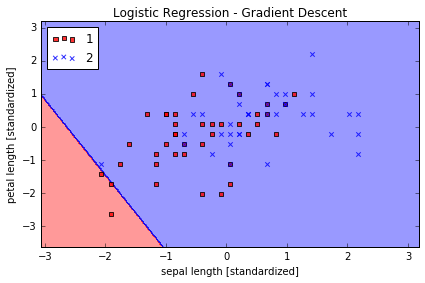

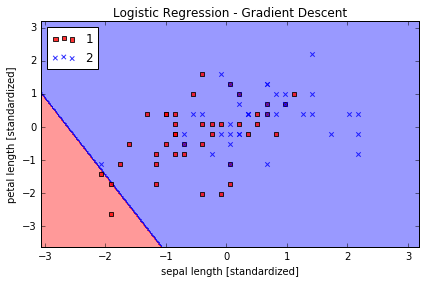

In [253]:
# Get the samples and labels in a training and test set.
X_train, X_test, y_train, y_test = get_iris_data(0,1,train_set_size=80,dataset=1)

# Train a logistic regression model.
# Vary n_iter and eta and view the results.
lr = LogisticRegressionGD(n_iter=20, eta=0.1)
lr.fit(X_train, y_train)

# Plot the training set.
plot_decision_regions(X_train, y_train, classifier=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# Plot the error over time.
plt.plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')

plt.tight_layout()
plt.show()

# Look at the progression of the classifier over time.
for i in range(0,10,2):
    plot_decision_regions(X_train, y_train, classifier=lr, iter_num=i)
    plt.title('Logistic Regression - Gradient Descent')
    plt.xlabel('sepal length [standardized]')
    plt.ylabel('petal length [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()

    plt.show()

('Number of errors: ', 11)
('Accuracy (%): ', 44.99999999999999)


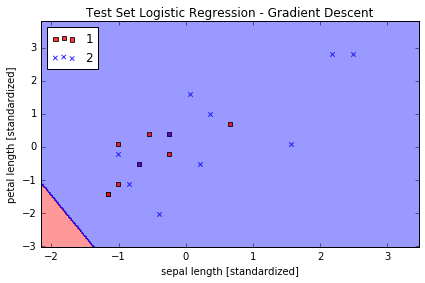

In [254]:
# Use the testing set to see how accurate the classifer is.
error = 0
for x_test_pt, y_test_pt in zip(X_test, y_test):
    #print(lr.predict(x_test_pt),y_test_pt)
    if (lr.predict(x_test_pt)) != y_test_pt:
        error += 1
print("Number of errors: ",error)
print("Accuracy (%): ", (1.0 - (error/float(len(y_test))))*100.0)

# Plot the testing set data.
plot_decision_regions(X_test, y_test, classifier=lr)
plt.title('Test Set Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

SKLearn Results:
('Actual:      ', array([1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2]))
('Predictions: ', array([1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1]))
('Accuracy: ', 0.69999999999999996)


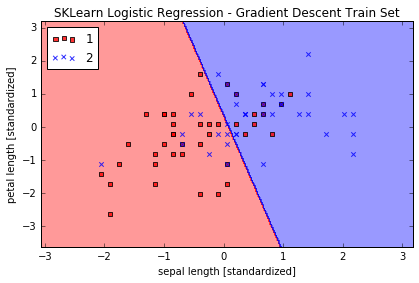

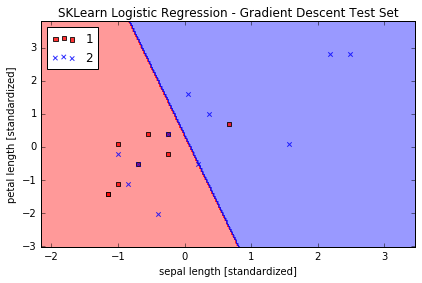

In [255]:
# Train an sklearn LogReg model
sklr = LogisticRegression()
sklr = sklr.fit(X_train, y_train)
predictions = sklr.predict(X_test)

print("SKLearn Results:")
print("Actual:      ",y_test)
print("Predictions: ",predictions)
print("Accuracy: ",metrics.accuracy_score(y_test, predictions))

# Plot the training set.
sk_learn_plot_decision_regions(X_train, y_train, classifier=sklr)
plt.title('SKLearn Logistic Regression - Gradient Descent Train Set')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# Plot the testing set data.
sk_learn_plot_decision_regions(X_test, y_test, classifier=sklr)
plt.title('SKLearn Logistic Regression - Gradient Descent Test Set')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In many cases, SKLearn outperforms our simple Logistic Regression implementation.  Why might that be?  What features, or defaults, in SKLearn are available that improve the classifier?  Hint: Look to how errors are determined.

### Alternate Features:

Let's try running with the features that visually have the lowest separation and see what happens.

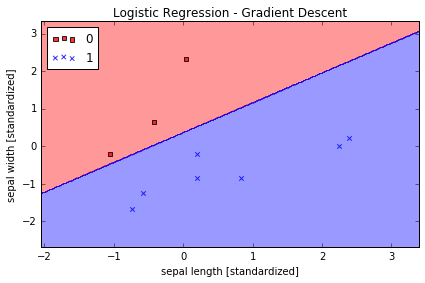

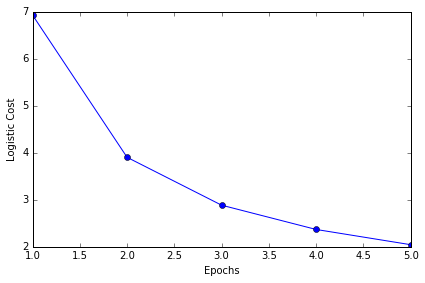

('Number of errors: ', 1)
('Accuracy (%): ', 98.88888888888889)


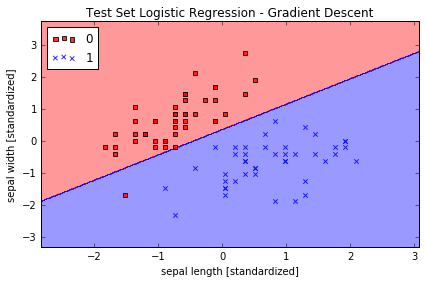

In [170]:
X_train, X_test, y_train, y_test = get_iris_data(0,1,train_set_size=10)
lr = LogisticRegressionGD(n_iter=05, eta=0.15)
lr.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, classifier=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')

plt.tight_layout()
plt.show()

# Use the testing set to see how accurate the classifer is.
error = 0
for x_test_pt, y_test_pt in zip(X_test, y_test):
    #print(lr.predict(x_test_pt),y_test_pt)
    if (lr.predict(x_test_pt)) != y_test_pt:
        error += 1
print("Number of errors: ",error)
print("Accuracy (%): ", (1.0 - (error/float(len(y_test))))*100.0)

plot_decision_regions(X_test, y_test, classifier=lr)
plt.title('Test Set Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()